In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [386]:
movies = pd.read_csv('tmdb_5000_movies.csv',index_col=3)
credits = pd.read_csv('tmdb_5000_credits.csv', index_col=0)

In [387]:
credits.head(10)

,title,cast,crew
movie_id,,,
19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."


In [388]:
movies['profit'] = movies.revenue - movies.budget
movies.head(2)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,profit
id,,,,,,,,,,,,,,,,,,,,
19995,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
285,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000


In [389]:
movies= movies.merge(credits)
movies.release_date = pd.to_datetime(movies['release_date'])
movies["year"] = movies.release_date.dt.year
movies.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,profit,cast,crew,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",2009.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",2007.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",2015.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",2012.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",2012.0


In [390]:
#preprocessing_normalize
from pandas.io.json import json_normalize
import json
def json_decode(data,key):
    
    """
Description: This function can be used to helpful to perform decoding in Python of JSON string.

Arguments:
    data: the data that we want decoding. 
    key: the key that we want to return its value.

Returns:
    list of values
"""
    result = []
    data = json.loads(data) #convert to jsonjsonn from string
    for item in data: #convert to list from json
        result.append(item[key])
    return result

In [391]:
movies.genres = movies.genres.apply(json_decode,key='name')
movies.keywords = movies.keywords.apply(json_decode,key='name')
movies.production_companies = movies.production_companies.apply(json_decode,key='name')
movies.production_countries = movies.production_countries.apply(json_decode,key='name')
movies.cast = movies.cast.apply(json_decode,key='name')
movies.crew = movies.crew.apply(json_decode,key='name')
movies.spoken_languages = movies.spoken_languages.apply(json_decode,key='name')

In [392]:
#movies.to_csv(r"C:\Users\cleaned_data.csv")

In [393]:
#clean the missing data
missing = movies.isnull().sum()
missing.sum()

3947

In [394]:
movies.shape

(4809, 23)

In [395]:
movies.dropna(inplace=True)

In [396]:
movies.shape

(1494, 23)

In [397]:
missing = movies.isnull().sum()
missing.sum()

0

In [398]:
movies.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,profit,cast,crew,year
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",2009.0
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",2007.0
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,"[Français, English, Español, Italiano, Deutsch]",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",2015.0
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,[English],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,834939099,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",2012.0
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,[English],Released,"Lost in our world, found in another.",John Carter,6.1,2124,24139100,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",2012.0


In [399]:
#movies.to_csv(r"C:\Users\cleaned_dataexex.csv")

In [400]:
#make a few encoding changes
#change genres to numeric
genres = set()
for item in movies.genres:
    for genre in item:
        genres.add(genre)
genres = list(genres)
print(genres)

#change companies to numeric
production_companies = set()
for item in movies.production_companies:
    for company in item:
        production_companies.add(company)
production_companies = list(production_companies)

#change countries to numeric
production_countries = set()
for item in movies.production_countries:
    for country in item:
        production_countries.add(country)
production_countries = list(production_countries)

['Documentary', 'Mystery', 'History', 'Foreign', 'TV Movie', 'Science Fiction', 'Action', 'Music', 'Fantasy', 'Drama', 'Family', 'Comedy', 'Western', 'Animation', 'Romance', 'War', 'Crime', 'Horror', 'Thriller', 'Adventure']


In [401]:
df = pd.DataFrame(columns=genres)
for index, row in movies.iterrows():
    for item in row['genres']:
        df.loc[index,item] = 1
df.fillna(0,inplace=True)        

#######
df2 = pd.DataFrame(columns=production_countries)
for index, row in movies.iterrows():
    for item in row['production_countries']:
        df2.loc[index,item] = 1
df2.fillna(0,inplace=True)


df2.head()

,Singapore,Sweden,Israel,Austria,Bhutan,Bahamas,Norway,Monaco,Bulgaria,Italy,...,Poland,Dominica,China,Morocco,Mexico,Ireland,Pakistan,Netherlands,Cambodia,Finland
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
movies = movies.join(df)
movies = movies.join(df2)

In [403]:
movies=movies.drop(['genres','keywords', 'original_title',
                    'overview','production_companies', 'production_countries',
                    'spoken_languages','status','title','tagline','homepage','original_language','release_date','cast','crew'], axis = 1)

In [404]:
movies.head(2)

,budget,popularity,revenue,runtime,vote_average,vote_count,profit,year,Documentary,Mystery,...,Poland,Dominica,China,Morocco,Mexico,Ireland,Pakistan,Netherlands,Cambodia,Finland
0,237000000,150.437577,2787965087,162.0,7.2,11800,2550965087,2009.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,300000000,139.082615,961000000,169.0,6.9,4500,661000000,2007.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [405]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
scaler.fit(movies.dropna()) # Drop na for fit
imputer = SimpleImputer()
data_imputed = imputer.fit_transform(movies) # Impute the mean for missing values
data_standard = scaler.fit_transform(data_imputed)


In [406]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(data_standard)


For 5 components, explained variance: 0.17495381354788403
For 10 components, explained variance: 0.2768637952281848
For 15 components, explained variance: 0.3635605735622592
For 20 components, explained variance: 0.44039741563339085
For 25 components, explained variance: 0.5107908381203672
For 30 components, explained variance: 0.5750393831893863
For 35 components, explained variance: 0.6364994328702571
For 40 components, explained variance: 0.6964945342343911
For 45 components, explained variance: 0.7536913731038501
For 50 components, explained variance: 0.8056936840844167
For 55 components, explained variance: 0.8517928243922281
For 60 components, explained variance: 0.891984684334245
For 65 components, explained variance: 0.9256773583611646
For 70 components, explained variance: 0.9555742325776041


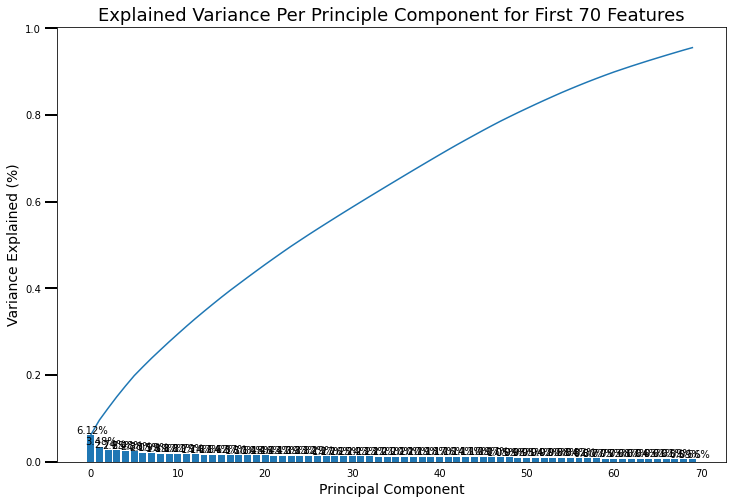

In [407]:
#we should take 95% variance Explained 's components.
for i in np.arange(5,75, 5):
    print('For {} components, explained variance:'.format(i), 
          pca.explained_variance_ratio_[:i].sum())
scree_plot(pca, limit=70, figsize=(12, 8))

In [408]:
pca_75 = PCA(n_components=75)
X_pca_75 = pca_75.fit_transform(data_standard)
kmeans_10 = KMeans(n_clusters=10).fit(X_pca_75)
kmeans_10.score(X_pca_75)

-100213.35909777008

In [409]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(X_pca_75)

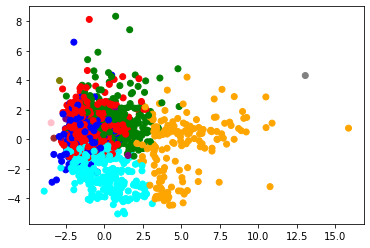

In [410]:
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b' , 3: 'gray',
                   4:'brown', 5:'orange', 6:'cyan', 7:'olive',
                   8:'purple', 9:'pink', 10:'grey'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.scatter( X_pca_75[:,0], X_pca_75[:,1], c=label_color)